# A Simple Example of Clustering 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

Try with other numbers of clusters and see if they match your expectations. Maybe 7 is going to be a cool one!

Plot the data using the <i> c </i> parameter to separate the data by the clusters we defined.  

<i> Note: c stands for color <i>

## Import the relevant libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Countries.csv'</i>.


In [3]:
data = pd.read_csv('5.2 Countries data.csv')
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


## Plot the data

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

Text(0.5, 1.0, 'Countries data')

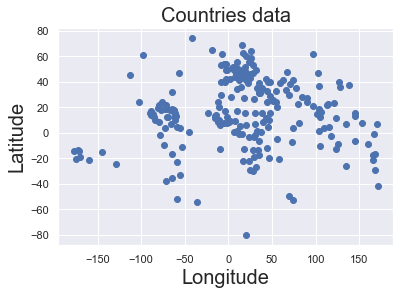

In [4]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.title('Countries data', fontsize=20)

## Select the features

Create a copy of that data and remove all parameters apart from <i>Longitude</i> and <i>Latitude</i>.

In [5]:
data_for_clustering = data.iloc[:, 1:3]
data_for_clustering

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


## Clustering

Assume there are only two clusters. 

In [6]:
kmeans = KMeans(7)

In [7]:
kmeans.fit(data_for_clustering)

KMeans(n_clusters=7)

### Clustering Resutls

In [8]:
identified_clusters = kmeans.fit_predict(data_for_clustering)

In [9]:
identified_clusters
data_clustered = data_for_clustering.copy()
data_clustered['Clusters'] = identified_clusters
data['geographic_clusters'] = identified_clusters
data_clustered.head()

,Longitude,Latitude,Clusters
0,-69.982677,12.520880,3
1,66.004734,33.835231,5
2,17.537368,-12.293361,4
3,-63.064989,18.223959,3
4,20.049834,41.142450,6


Did you remember to use the <i> c </i> parameter to separate the data by the clusters we defined?

Text(0.5, 1.0, 'Countries data clustered')

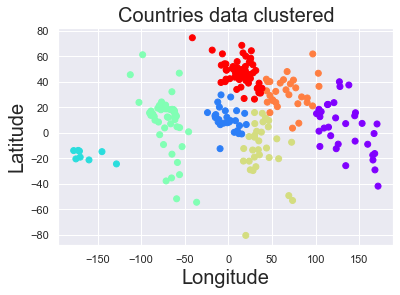

In [10]:
plt.scatter(data_clustered['Longitude'], data_clustered['Latitude'], c=data_clustered['Clusters'], cmap='rainbow')
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.title('Countries data clustered', fontsize=20)

If you haven't, go back and play around with the number of clusters. 

Try 3, 7 and 8 and see if the results match your expectations!

## Clustering categorical data

In [11]:
data

,name,Longitude,Latitude,continent,geographic_clusters
0,Aruba,-69.982677,12.520880,North America,3
1,Afghanistan,66.004734,33.835231,Asia,5
2,Angola,17.537368,-12.293361,Africa,4
3,Anguilla,-63.064989,18.223959,North America,3
4,Albania,20.049834,41.142450,Europe,6
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania,2
237,Yemen,47.586762,15.909280,Asia,5
238,South Africa,25.083901,-29.000341,Africa,4
239,Zambia,27.774759,-13.458242,Africa,4


In [12]:
data_mapped = data.copy()
data_mapped['continent'].unique()

array(['North America', 'Asia', 'Africa', 'Europe', 'South America',
       'Oceania', 'Antarctica', 'Seven seas (open ocean)'], dtype=object)

In [13]:
data_mapped['continent_dummies'] = data_mapped['continent'].map({
    'North America': '0', 'Asia': '1', 'Africa': '2', 'Europe': '3', 'South America': '4',
       'Oceania': '5', 'Antarctica': '6', 'Seven seas (open ocean)': '7'
})
data_mapped

,name,Longitude,Latitude,continent,geographic_clusters,continent_dummies
0,Aruba,-69.982677,12.520880,North America,3,0
1,Afghanistan,66.004734,33.835231,Asia,5,1
2,Angola,17.537368,-12.293361,Africa,4,2
3,Anguilla,-63.064989,18.223959,North America,3,0
4,Albania,20.049834,41.142450,Europe,6,3
...,...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania,2,5
237,Yemen,47.586762,15.909280,Asia,5,1
238,South Africa,25.083901,-29.000341,Africa,4,2
239,Zambia,27.774759,-13.458242,Africa,4,2


In [14]:
data_for_clustering = data_mapped.iloc[:, 5:6]
kmeans.fit(data_for_clustering)
identified_continent_clusters = kmeans.fit_predict(data_for_clustering)
data_mapped['continental_clusters'] = identified_continent_clusters
data_clustered = data_mapped.copy()
data_mapped

,name,Longitude,Latitude,continent,geographic_clusters,continent_dummies,continental_clusters
0,Aruba,-69.982677,12.520880,North America,3,0,2
1,Afghanistan,66.004734,33.835231,Asia,5,1,5
2,Angola,17.537368,-12.293361,Africa,4,2,0
3,Anguilla,-63.064989,18.223959,North America,3,0,2
4,Albania,20.049834,41.142450,Europe,6,3,4
...,...,...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania,2,5,3
237,Yemen,47.586762,15.909280,Asia,5,1,5
238,South Africa,25.083901,-29.000341,Africa,4,2,0
239,Zambia,27.774759,-13.458242,Africa,4,2,0


Text(0.5, 1.0, 'Countries data clustered')

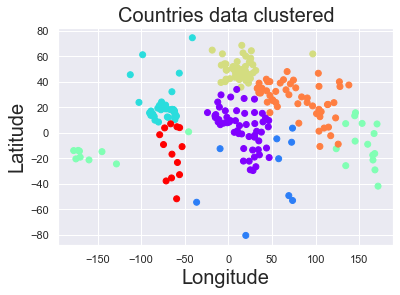

In [15]:
plt.scatter(data_clustered['Longitude'], data_clustered['Latitude'], c=data_clustered['continental_clusters'], cmap='rainbow')
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.title('Countries data clustered', fontsize=20)

In [16]:
kmeans.inertia_

0.8888888888888888

Text(0.5, 1.0, 'Elbow Plot')

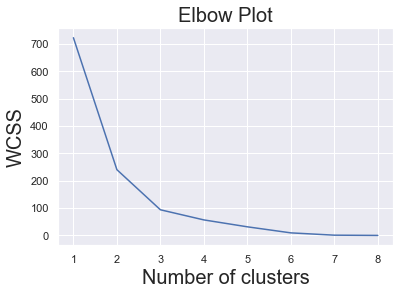

In [17]:
wcss = []
number_of_clusters = range(1, 9)
for i in number_of_clusters:
    kmeans = KMeans(i)
    kmeans.fit(data_for_clustering)
    wcss.append(kmeans.inertia_)

plt.plot(number_of_clusters, wcss)
plt.xlabel('Number of clusters', fontsize=20)
plt.ylabel('WCSS', fontsize=20)
plt.title('Elbow Plot', fontsize=20)